In [1]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# cargamos nuestro dataset
wine = pd.read_csv('vinos_tintos.csv')

Analisis univariadas y limpieza de datos

In [3]:
# miramos el dataset y como aparece!
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,country,pricing
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,49.0,Spain,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,0.098,52.0,Italy,Expensive
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,0.098,52.0,Italy,Expensive
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,0.098,72.0,Italy,Budget
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,56.0,Italy,Budget


In [4]:
print(wine.shape)

(1599, 14)


In [5]:
wine.count()

fixed acidity           1594
volatile acidity        1599
citric acid             1599
residual sugar          1594
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1594
success                 1599
country                 1599
pricing                 1599
dtype: int64

In [6]:
# miramos ahora las tipologia de variables que tenemos
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1594 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1594 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1594 non-null   float64
 11  success               1599 non-null   float64
 12  country               1599 non-null   object 
 13  pricing               1599 non-null   object 
dtypes: float64(12), object(2)
memory usage: 175.0+ KB


In [7]:
type(wine)

pandas.core.frame.DataFrame

In [8]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
success                 float64
country                  object
pricing                  object
dtype: object

In [9]:
print(wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'success', 'country', 'pricing'],
      dtype='object')


In [10]:
wine.isnull().sum()

fixed acidity           5
volatile acidity        0
citric acid             0
residual sugar          5
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 5
success                 0
country                 0
pricing                 0
dtype: int64

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
count,1594.000000,1599.000000,1599.000000,1594.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1594.000000,1599.000000
mean,8.321455,0.527821,0.270976,2.521982,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,0.104240,57.774234
std,1.741475,0.179060,0.194801,1.438068,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,0.010659,14.174611
min,4.600000,0.120000,0.000000,-4.021123,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,0.084000,-0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,0.095000,48.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,0.102000,57.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,0.111000,67.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,0.149000,96.000000


<AxesSubplot:xlabel='country', ylabel='count'>

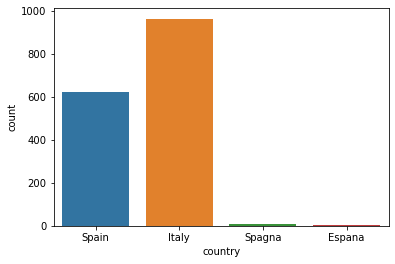

In [12]:
# empezamos con un grafico de barras de la proveniencia geografica
sns.countplot(x='country', data=wine)

In [13]:
# selecionamos todas las lineas que contienen "spa"
spain_data = wine['country'].str.contains('spa', case = False)
spain_data

0        True
1       False
2       False
3       False
4       False
        ...  
1594     True
1595    False
1596    False
1597    False
1598     True
Name: country, Length: 1599, dtype: bool

In [14]:
# si una linea contiene spa, la convertimos en Espana
wine['country'] = np.where(spain_data, 'Spain', wine['country'])

<AxesSubplot:xlabel='country', ylabel='count'>

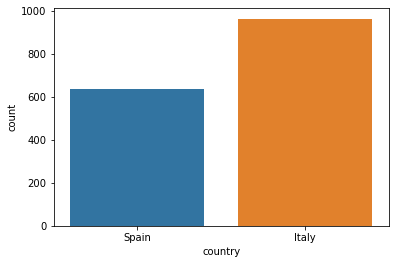

In [15]:
#despues de esta correcion, podemos mirar otra vez nuestro grafico de barras
sns.countplot(x='country', data=wine)

<AxesSubplot:xlabel='pricing', ylabel='count'>

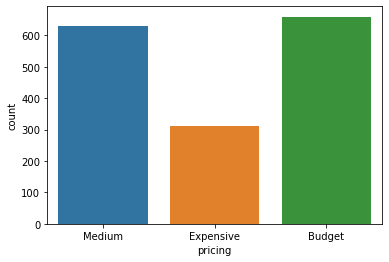

In [16]:
# seguimos ahora con un grafico de barras de los rango de precios
sns.countplot(x='pricing', data=wine)

<AxesSubplot:ylabel='success'>

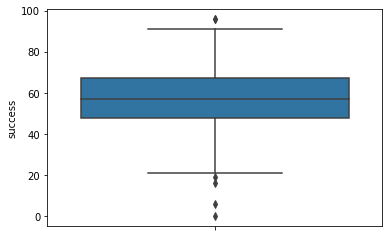

In [17]:
# ahora hacemos un boxplot de la variable success
sns.boxplot(y = 'success', data = wine)

c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success', ylabel='Density'>

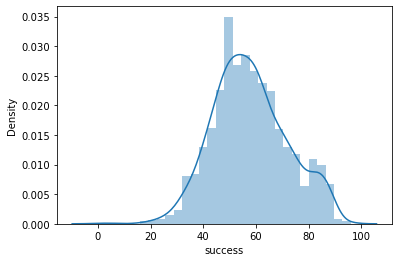

In [19]:
#seguimos con un histograma
sns.distplot(wine['success'])

c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success'>

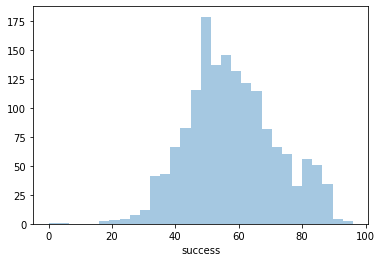

In [20]:
# y si quieremos ver frequencias en lugar de probabilidades
sns.distplot(wine['success'], kde = False)

<AxesSubplot:ylabel='residual sugar'>

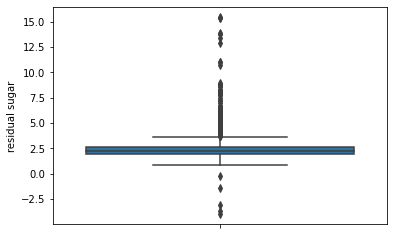

In [21]:
# ahora miramos el percentaje de azucar
sns.boxplot(y = 'residual sugar', data = wine)

In [22]:
# y si queremos eliminar los valores anomalos negativos?
negative_sugar = wine['residual sugar'] < 0
wine = wine.drop(wine[negative_sugar].index)

<AxesSubplot:ylabel='residual sugar'>

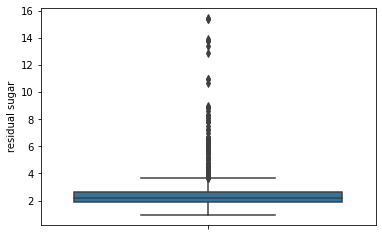

In [23]:
# ahora miramos el percentaje de azucar otra vez, despues de haber eliminados estos valores
sns.boxplot(y = 'residual sugar', data = wine)

In [24]:
# ahora vamos a ver si hay valores faltantes
wine.isnull().sum()

fixed acidity           5
volatile acidity        0
citric acid             0
residual sugar          5
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 5
success                 0
country                 0
pricing                 0
dtype: int64

In [25]:
# ya que son pocos, podemos quitar estas lineas
wine = wine[wine['residual sugar'].notna()]
wine = wine[wine['alcohol'].notna()]
wine = wine[wine['fixed acidity'].notna()]

In [26]:
# comprobamos ahora que se hayan eliminado
print(wine['residual sugar'].isnull().sum())
print(wine['alcohol'].isnull().sum())
print(wine['fixed acidity'].isnull().sum())

0
0
0


c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol'>

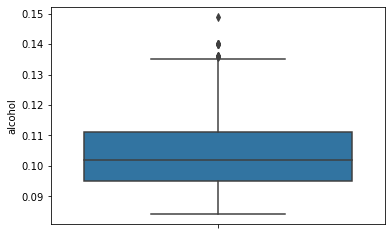

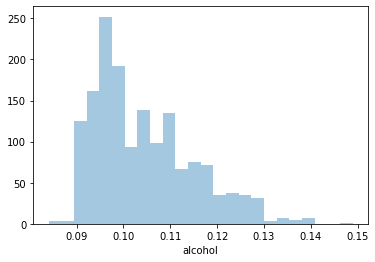

In [27]:
# por fin, miramos histograma y boxplot de alcohol
sns.boxplot(y = 'alcohol', data = wine)
plt.figure()
sns.distplot(wine['alcohol'], kde = False)

# Analisis multivariadas

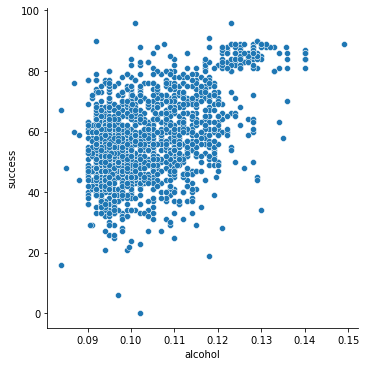

In [28]:
# Primero empezamos con el scatter plot
sns.relplot(x="alcohol", y="success", data=wine)

<AxesSubplot:xlabel='alcohol', ylabel='success'>

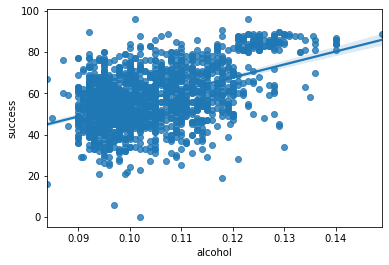

In [29]:
# ahora scatter plot mas linea, para identificar mejor las tendencias
sns.regplot(x='alcohol', y="success", data=wine)

AxesSubplot(0.125,0.125;0.775x0.755)


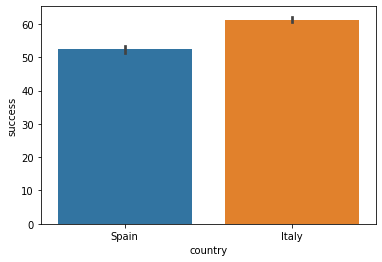

In [30]:
# ahora vamos con correlacion entre variable categorica y variable numerica!
print(sns.barplot(x = 'country', y = 'success', data = wine))

<AxesSubplot:xlabel='country', ylabel='success'>

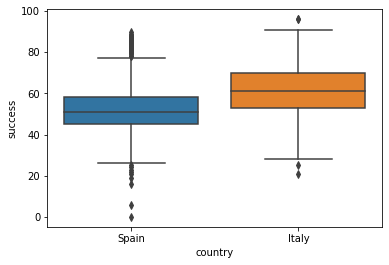

In [31]:
# mismas variables, con el boxplot lo vemos con mas detalles
sns.boxplot(x = 'country', y = 'success', data = wine)

In [32]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
success                 float64
country                  object
pricing                  object
dtype: object

<AxesSubplot:>

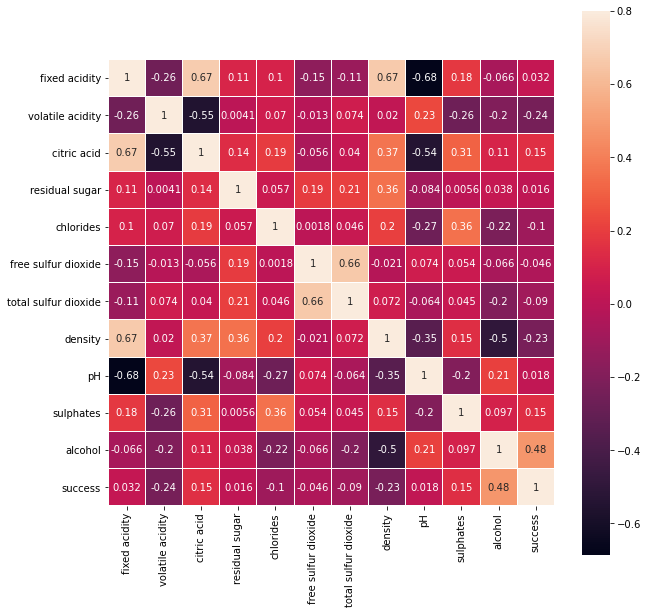

In [33]:
# y si queremos mirar todas las correlaciones?
corr = wine.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

In [34]:
# y si queremos mirar todos los scatter plot?
sns.pairplot(wine)

KeyboardInterrupt: 

# Visualizaciones de datos

In [ ]:
sns.lmplot(x='alcohol', y="success", data=wine)

NameError: name 'sns' is not defined

In [ ]:
sns.lmplot(x='alcohol', y="success", data=wine, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

In [ ]:
sns.lmplot(x='alcohol', y="success", col = 'country', data=wine, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

In [ ]:
alcohol_success_plot = sns.lmplot(x='alcohol', y="success", data=wine, col = 'country', truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})
sns.despine()
axes = alcohol_success_plot.axes.flatten()
axes[0].set_title("Vinos espanoles")
axes[1].set_title("Vinos espanoles")


In [ ]:
alcohol_success_plot = sns.lmplot(x='alcohol', y="success", data=wine, col = 'country', truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})
sns.despine()
axes = alcohol_success_plot.axes.flatten()
axes[0].set_title("Vinos italianos")
axes[1].set_title("Vinos espanoles")
vals = axes[1].get_xticks()
axes[1].set_xticklabels(['{:,.1%}'.format(x) for x in vals])

In [ ]:
alcohol_success_plot = sns.lmplot(x='alcohol', y="success", data=wine, col = 'country', truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})
sns.despine()
axes = alcohol_success_plot.axes.flatten()
axes[0].set_title("Vinos italianos")
axes[1].set_title("Vinos espanoles")
vals = axes[1].get_xticks()
axes[1].set_xticklabels(['{:,.1%}'.format(x) for x in vals])
plt.suptitle('Más alcohol, más éxito, en Italia como en España! \n  ¡Podemos predecir el éxito de un vino!',fontsize=24,ha='center',va='top',color='#000088', y=1.2)

# Nuestro primero model predictivo

In [ ]:
# cargamos las funciones necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# primero: dividimos los datos entre training y test, la variable dependente (y) como las independientes
X = wine[['alcohol']]
y = wine['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
# vemos que tenemos en el split
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
# escogemos como algoritmo una regresion linear
regr = LinearRegression()
# Entrenamos el modelo utilizando el train set
regr.fit(X_train,y_train)

In [ ]:
# probamos ahora valores distintos
regr.predict([[0.11]])

# Evaluaciones de modelo predictivo


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# hacemos las predicciones en el test set
regr.predict(X_test)

In [ ]:
# ahora miramos el error
print(mean_absolute_error(regr.predict(X_test), y_test))
print(sqrt(mean_squared_error(regr.predict(X_test), y_test)))

In [ ]:
# ahora probamos un otro modelo, usando alcohol y acidez
X2 = wine[['alcohol', 'volatile acidity']]
y2 = wine['success']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 3)
regr2 = LinearRegression()
# Entrenamos el modelo utilizando el train set
regr2.fit(X2_train,y2_train)
print(mean_absolute_error(regr2.predict(X2_test), y2_test))
print(sqrt(mean_squared_error(regr2.predict(X2_test), y2_test)))

# Encoding de variables

In [ ]:
# importamos hacemos encoding de nuestras variables!
wine['is_spain'] = np.where(wine['country'] == 'Spain', 1, 0)
wine['pricing_enc'] = np.where(wine['pricing'] == 'Budget', 1, np.where(wine['pricing'] == 'Medium', 2, 3))
wine

In [ ]:
# Evaluamos otra vez la performance de este modelo
# ahora probamos un otro modelo, usando alcohol y acidez
X3 = wine.drop(['country', 'pricing', 'success'], axis = 1)
y3 = wine['success']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 3)
regr3 = LinearRegression()
# Entrenamos el modelo utilizando el train set
regr3.fit(X3_train,y3_train)
print(mean_absolute_error(regr3.predict(X3_test), y3_test))
print(sqrt(mean_squared_error(regr3.predict(X3_test), y3_test)))

# Random Forest and hyperparameter optimization

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Ahora pruebamos un modelo de random forest en lugar de uno de linear regression.
# Empezamos con parametros fijos
X4 = wine.drop(['country', 'pricing', 'success'], axis = 1)
y4 = wine['success']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 3)
regr4 = RandomForestRegressor(n_estimators = 5, max_features = 10)
# Entrenamos el modelo utilizando el train set
regr4.fit(X4_train,y4_train)
print(mean_absolute_error(regr4.predict(X4_test), y4_test))
print(sqrt(mean_squared_error(regr4.predict(X4_test), y4_test)))

In [ ]:
# probamos ahora distintos parametros por las forestas aleatorias
param_grid = [
{'n_estimators': [10, 25, 100, 150, 200], 'max_features': [5, 10]}]

grid_search_forest = GridSearchCV(regr4, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search_forest.fit(X4_train, y4_train)

In [ ]:
#seleccionamos el mejor
best_forest = grid_search_forest.best_estimator_
best_forest

In [ ]:
# miramos ahora el resultado
best_forest.fit(X4_train,y4_train)
print(mean_absolute_error(best_forest.predict(X4_test), y4_test))
print(sqrt(mean_squared_error(best_forest.predict(X4_test), y4_test)))